# Linear Regression Assignment

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


## Business Goal:
Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

## Important steps
* Data understanding
* EDA
* Data preprocessing for model
* Model building 
* Model evaluation

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Import the dataset

In [2]:
data = pd.read_csv('day.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Check for data types

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# convert date data type
data['dteday'] = pd.to_datetime(data['dteday'], format='%d-%m-%Y')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    int64         
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    int64         
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [6]:
data.shape

(730, 16)

In [7]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

### check for null values

In [8]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### check for numerical columns distribution

In [9]:
data.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018-12-31 12:00:00,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
min,1.000000,2018-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018-07-02 06:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018-12-31 12:00:00,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019-07-01 18:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647


* No null values observed from the data set

## Encoding category variables

In [10]:
#season : season (1:spring, 2:summer, 3:fall, 4:winter)
data['season'] = data['season'].map({1:'Spring', 2:'Summer',3:'Fall',4:'Winter'})

In [11]:
data['season'].value_counts()

season
Fall      188
Summer    184
Spring    180
Winter    178
Name: count, dtype: int64

In [12]:
#yr : year (0: 2018, 1:2019)
data['yr'] = data['yr'].map({0:'2018',1:'2019'})

In [13]:
data['yr'].value_counts()

yr
2018    365
2019    365
Name: count, dtype: int64

In [14]:
#mnth : month ( 1 to 12)
data['mnth'] = data['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                                 7:'Jul', 8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [15]:
data['mnth'].value_counts()

mnth
Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: count, dtype: int64

In [16]:
# weekday : day of the week
data['weekday'] = data['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})

In [17]:
data['weekday'].value_counts()

weekday
Tue    105
Wed    105
Thu    104
Fri    104
Sat    104
Sun    104
Mon    104
Name: count, dtype: int64

In [18]:
#Clear, Few clouds, Partly cloudy, Partly cloudy
#2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
#4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
data['weathersit'] = data['weathersit'].map({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

In [19]:
data['weathersit'].value_counts()

weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64

In [20]:
# whether day is a holiday or not (0: No, 1: Yes)
data['holiday'] = data['holiday'].map({0:'No',1:'Yes'})

In [21]:
data['holiday'].value_counts()

holiday
No     709
Yes     21
Name: count, dtype: int64

In [22]:
data['workingday'] = data['workingday'].map({0:'Holiday',1:'Not Holiday'})

In [23]:
data['workingday'].value_counts()

workingday
Not Holiday    504
Holiday        226
Name: count, dtype: int64

# EDA
* Understanding the data
* Univariate analysis
* Bivariate analysis

### Univariate analysis of numerical columns

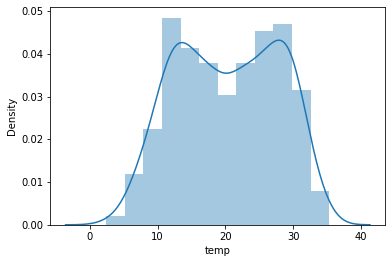

In [24]:
sns.distplot(x=data['temp'])
plt.xlabel('temp')
plt.show()

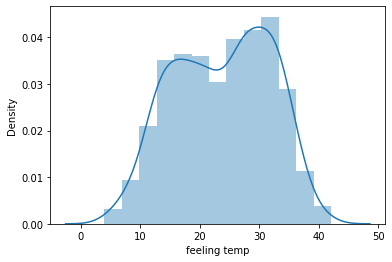

In [25]:
sns.distplot(x=data['atemp'])
plt.xlabel('feeling temp')
plt.show()

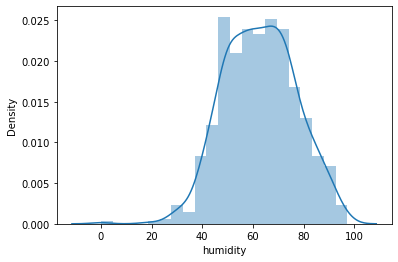

In [26]:
sns.distplot(x=data['hum'])
plt.xlabel('humidity')
plt.show()

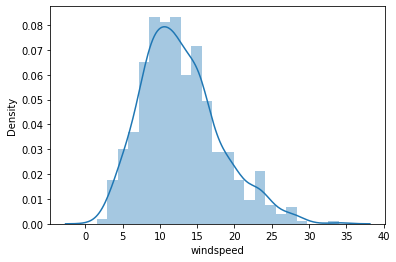

In [27]:
sns.distplot(x=data['windspeed'])
plt.xlabel('windspeed')
plt.show()

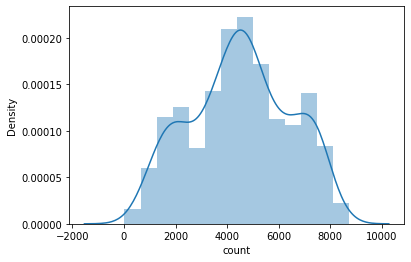

In [28]:
sns.distplot(x=data['cnt'])
plt.xlabel('count')
plt.show()

### Observations - Univariate analysis of Numerical columns
* Major distribution of temperature between 10-30.
* Overall feels like temperature distribution is slightly wider than temperature.
* Humidity distribution slightly left skewed and major distribution around 50-70.
* Windspeed is sligtly right skewed and major distribution around 5-20.
* Target or count major distribution lies between 4000-5000.

## Categorical variables EDA

In [29]:
cat_var = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
dep_var = ['cnt']

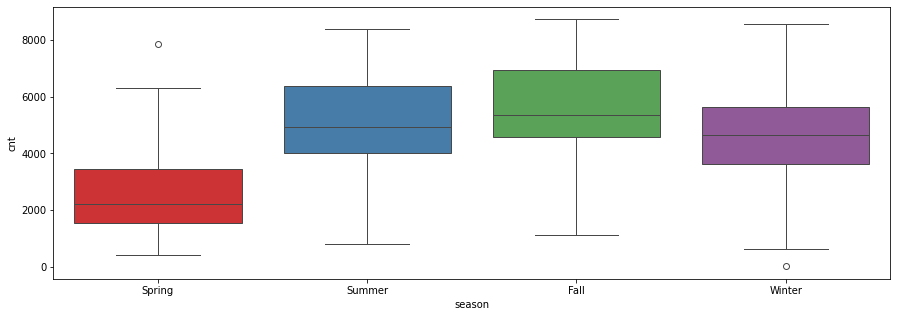

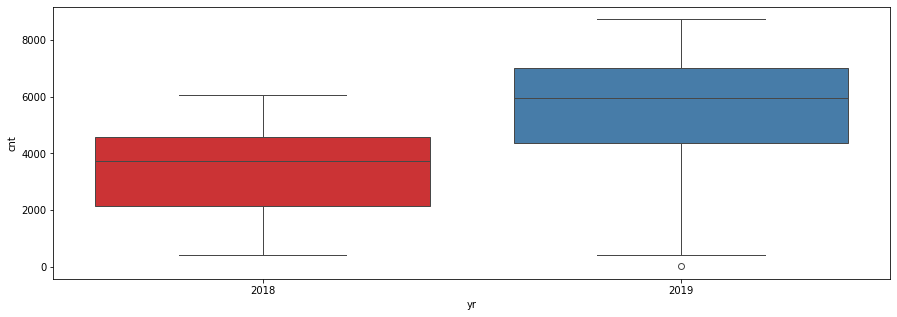

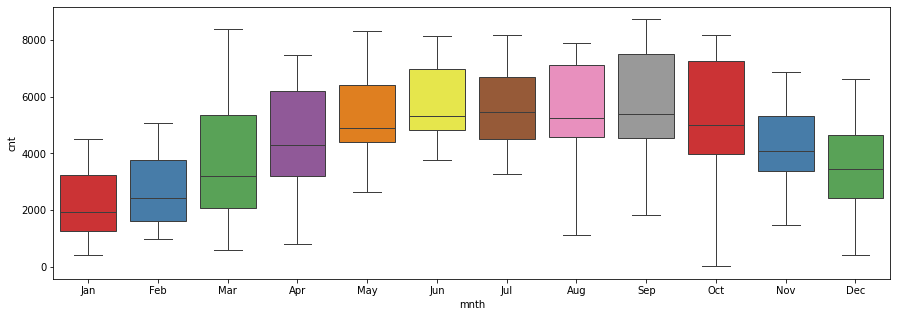

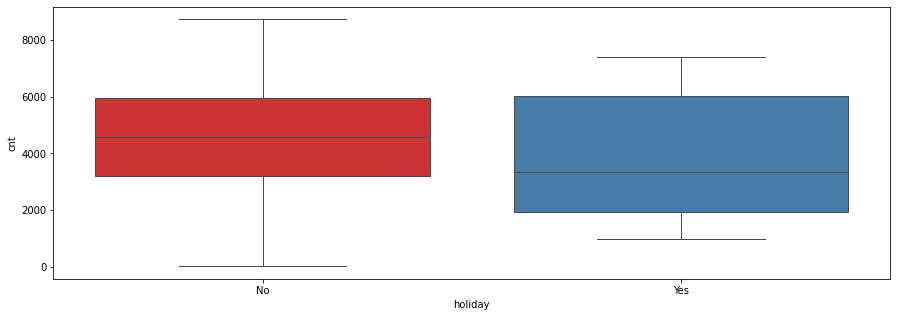

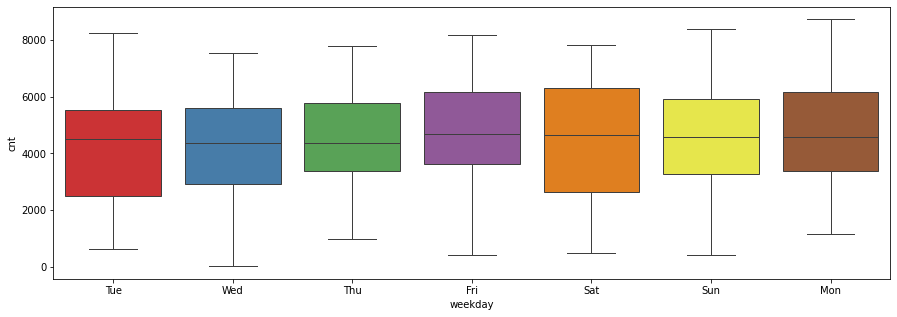

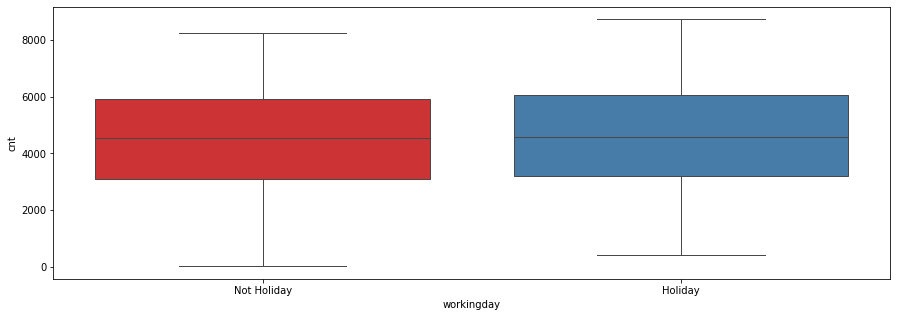

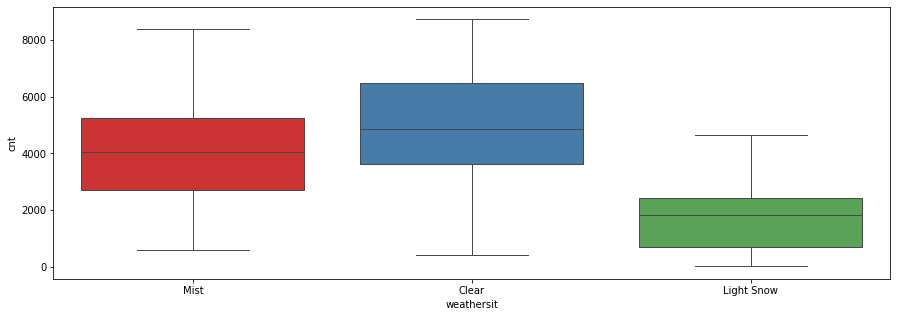

In [30]:
for i in cat_var:
    for j in dep_var:
        plt.figure(figsize=(15,5))
        sns.boxplot(x=data[i],y=data[j],palette="Set1")
        plt.show()

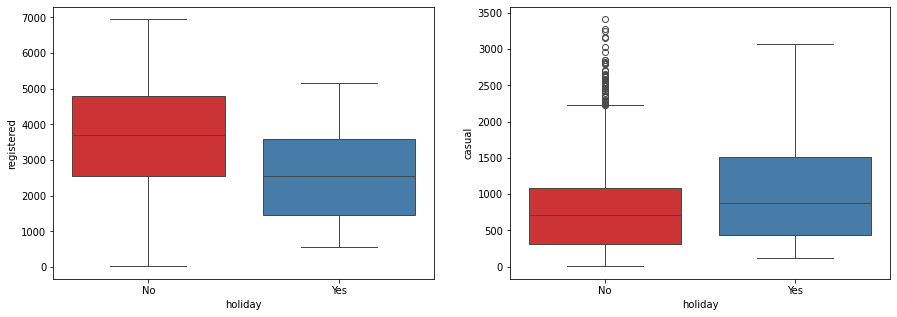

In [31]:
f, axes = plt.subplots(1, 2, figsize=(15,5))

sns.boxplot(x=data['holiday'],y=data['registered'],palette="Set1",ax=axes[0])

sns.boxplot(x=data['holiday'],y=data['casual'],palette="Set1",ax=axes[1])

plt.show()

## Observations - Categorical columns box plot
* Season - Summer and fall are most popular season for cycling. it is observed during fall maximum count of rental bikes hired. and lowest count observed during spring.
* Year 2019 seen almost twice the number of rental bikes users than year 2018.
* Count of rental bikes were significantly high for June, July, August and September months.
* Count of rental bikes were lower for Jan, Feb and Dec months.
* Non-holiday seen higher number of rental bikes users than holiday.
* Clear sky or partly cloudy were the best weather for higher count of rental bikes.

### Casual vs Registered users
* Count of rental bikes seen higher on holidays for casual users compared to non-holiday, it is vice-versa for registered users
* There is a significant difference in  count of rental bikes numbers between casual and registered users during different weathersit (example – mean count of rental bikes for casual users 1-964 vs 185 and for registered users 1-3912 vs 3-1617)

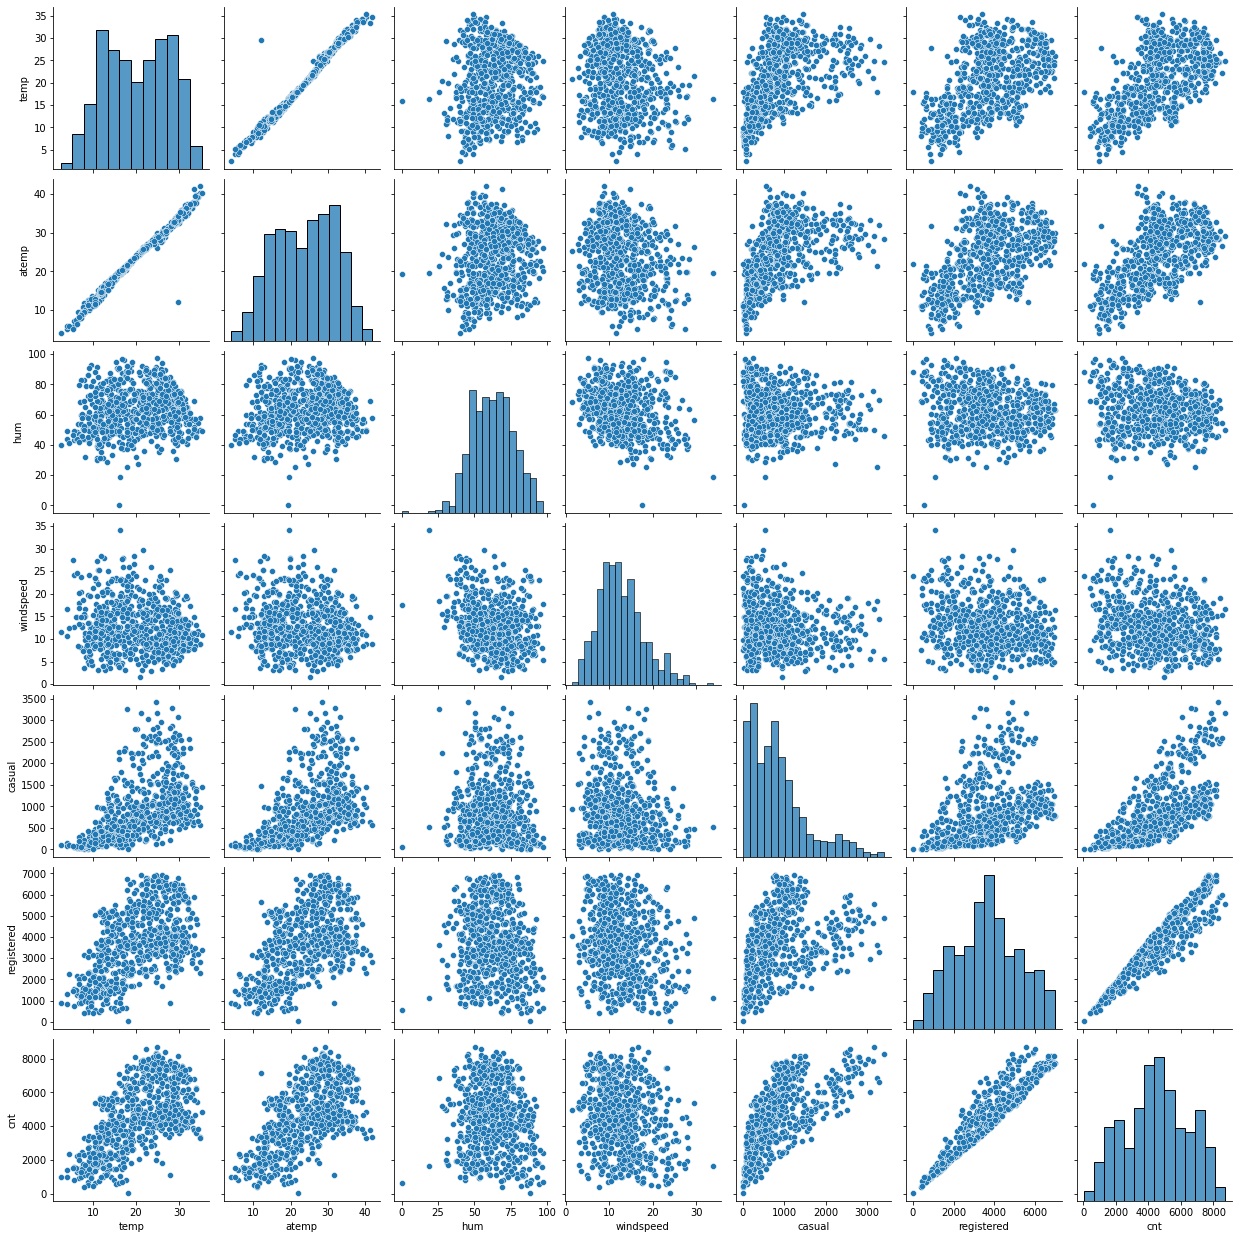

In [32]:
sns.pairplot(data[['temp','atemp','hum','windspeed','casual','registered','cnt']])

In [33]:
cor = data[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


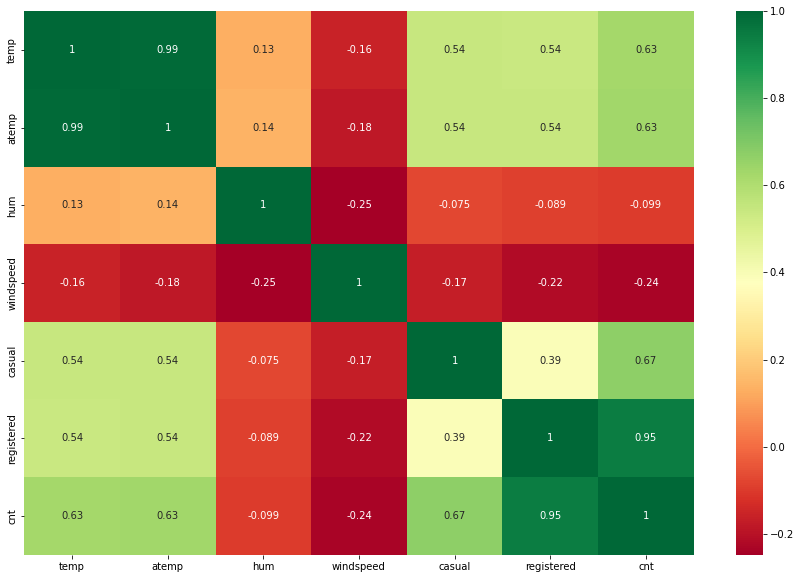

In [34]:
plt.figure(figsize=(15,10))
sns.heatmap(cor, annot=True, cmap='RdYlGn')
plt.show()

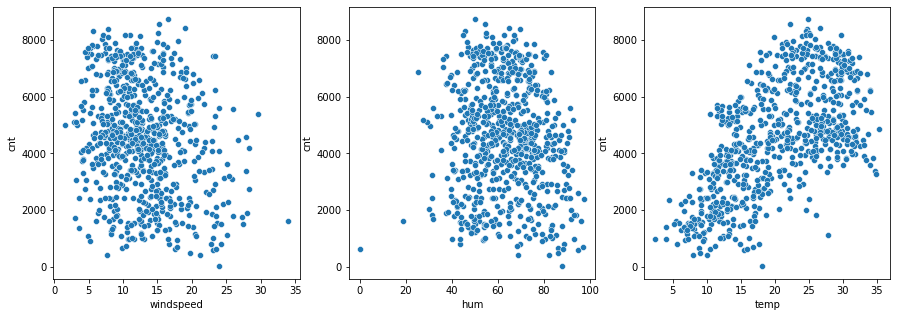

In [35]:
f, axes = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(x=data['windspeed'],y=data['cnt'],ax=axes[0])

sns.scatterplot(x=data['hum'],y=data['cnt'],ax=axes[1])

sns.scatterplot(x=data['temp'],y=data['cnt'],ax=axes[2])

plt.show()

## Observations - Bivariate / Multivariate analysis
### Correlatation with target variable
* ‘Registered’ have the highest correlation with ‘cnt’ target variable
* Casual and temp has the 2nd highest correlation with ‘cnt’ target variable
* Humidity and windspeed have no correlation with target variable 'cnt'

### Correlation between independent variables
* Very high 0.99 correlation between temp and atemp
* atemp can be dropped to avoid multicollinearity

### Numerical vs Target
* When the winspeed is lower cont of rental bikes is higher
* Higher the humidity likely to gets higher count of rental bikes
* As the temperature increases count of rental bikes increase 

# Data preparation / Data preprocessing for model building

In [36]:
#remove highly correlated independent variable (temp vs atemp), dropping atemp
data = data.drop('atemp',axis=1)
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,Spring,2018,Jan,No,Tue,Not Holiday,Mist,14.110847,80.5833,10.749882,331,654,985
1,2,2018-01-02,Spring,2018,Jan,No,Wed,Not Holiday,Mist,14.902598,69.6087,16.652113,131,670,801
2,3,2018-01-03,Spring,2018,Jan,No,Thu,Not Holiday,Clear,8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,Spring,2018,Jan,No,Fri,Not Holiday,Clear,8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,Spring,2018,Jan,No,Sat,Not Holiday,Clear,9.305237,43.6957,12.522300,82,1518,1600


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    object        
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    object        
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    object        
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  casual      730 non-null    int64         
 13  registered  730 non-null    int64         
 14  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(7)
memory usage: 85.7+ 

In [38]:
# ruuning a loop based on dtype 'object'.
i=0
cat_cols = []

for col in data.columns:
    if (data[col].dtypes == 'object'):
        #print(col,len(data[col].unique()))
        i=i+1
        cat_cols.append(col)

In [39]:
cat_cols

['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### Using dummy variables for the categorical columns

In [40]:
data_dummies = pd.get_dummies(data[cat_cols], drop_first=True,dtype=int)
data_dummies.head()

,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not Holiday,weathersit_Light Snow,weathersit_Mist
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,1
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [41]:
# Drop categorical variable columns from original data frame
data = data.drop(cat_cols, axis=1)
data.head()

,instant,dteday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,14.110847,80.5833,10.749882,331,654,985
1,2,2018-01-02,14.902598,69.6087,16.652113,131,670,801
2,3,2018-01-03,8.050924,43.7273,16.636703,120,1229,1349
3,4,2018-01-04,8.200000,59.0435,10.739832,108,1454,1562
4,5,2018-01-05,9.305237,43.6957,12.522300,82,1518,1600


In [42]:
data = pd.concat([data, data_dummies], axis = 1)
data.head()

,instant,dteday,temp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not Holiday,weathersit_Light Snow,weathersit_Mist
0,1,2018-01-01,14.110847,80.5833,10.749882,331,654,985,1,0,...,0,0,0,0,0,1,0,1,0,1
1,2,2018-01-02,14.902598,69.6087,16.652113,131,670,801,1,0,...,0,0,0,0,0,0,1,1,0,1
2,3,2018-01-03,8.050924,43.7273,16.636703,120,1229,1349,1,0,...,0,0,0,0,1,0,0,1,0,0
3,4,2018-01-04,8.200000,59.0435,10.739832,108,1454,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,2018-01-05,9.305237,43.6957,12.522300,82,1518,1600,1,0,...,0,0,1,0,0,0,0,1,0,0


In [43]:
# Dropping 'instant' and 'dteday' as these independent variables doesnt affect analysis
data = data.drop(['instant','dteday'],axis=1)
data.head()

,temp,hum,windspeed,casual,registered,cnt,season_Spring,season_Summer,season_Winter,yr_2019,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not Holiday,weathersit_Light Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,331,654,985,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,14.902598,69.6087,16.652113,131,670,801,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,8.050924,43.7273,16.636703,120,1229,1349,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,8.200000,59.0435,10.739832,108,1454,1562,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,82,1518,1600,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [44]:
data.columns

Index(['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'yr_2019',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'holiday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'workingday_Not Holiday',
       'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [45]:
#dropping registered and casual columns as they are total of target 'cnt' column.
data = data.drop(['registered', 'casual'],axis=1)
data.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not Holiday,weathersit_Light Snow,weathersit_Mist
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


## Data Scaling
* Where the minimum of feature is made equal to zero and the maximum of feature equal to one. MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.
* Scaling applies to numerical columns and not dummy variables

In [46]:
var = ['temp','hum','windspeed','cnt']
scaler = MinMaxScaler()
data[var] = scaler.fit_transform(data[var])
data.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not Holiday,weathersit_Light Snow,weathersit_Mist
0,0.355170,0.828620,0.284606,0.110792,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0.379232,0.715771,0.466215,0.089623,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
2,0.171000,0.449638,0.465740,0.152669,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.175530,0.607131,0.284297,0.177174,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.209120,0.449313,0.339143,0.181546,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


# Model Building and Evaluation

In [47]:
# splitting X input and y output from preprocessed data frame
X = data.drop('cnt',axis=1)
y = data['cnt']
# check size of X and y
print(X.shape)
print(y.shape)

(730, 28)
(730,)


In [48]:
#splitting train and test data, 20% of considered for model evaluation
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [49]:
X_train.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,mnth_Feb,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not Holiday,weathersit_Light Snow,weathersit_Mist
239,0.807351,0.577650,0.581909,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
97,0.344785,0.859897,0.421794,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
503,0.673950,0.469152,0.126957,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
642,0.692641,0.645244,0.173084,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
498,0.640722,0.811911,0.392314,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,1


In [50]:
y_train.head()

239    0.496088
97     0.166705
503    0.951680
642    0.935803
498    0.324551
Name: cnt, dtype: float64

In [51]:
# Fit on training data
reg = LinearRegression().fit(X_train,y_train)

In [52]:
# Printing coeff from fitted training data
coeff_df = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
temp,0.439459
hum,-0.199440
windspeed,-0.172639
season_Spring,-0.093299
season_Summer,0.006215
season_Winter,0.074683
yr_2019,0.222058
mnth_Aug,-0.016804
mnth_Dec,-0.052853
mnth_Feb,-0.038273


In [53]:
#print training intercept
reg.intercept_

0.4779232600239434

In [54]:
# Making predictions
y_pred = reg.predict(X_test)
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
196,0.678900,0.463833
187,0.525771,0.538188
14,0.141049,0.126692
31,0.153935,0.116363
390,0.466291,0.418399
...,...,...
118,0.526116,0.504001
566,0.510469,0.418111
688,0.645651,0.585395
266,0.621376,0.561391


## Model evaluation

In [55]:
# Evaluating metrics

print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0681673157065453
Mean Squared Error: 0.00759425422997748
Root Mean Squared Error: 0.08714501838876093


In [56]:
# Print R2 score
print('R2 Score:',r2_score(y_test,y_pred))

R2 Score: 0.8704045149316652


In [57]:
# calculating r2 and adjusted r2 on training data
yhat = reg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print('training data', r_squared, adjusted_r_squared)

training data 0.8373120128681546 0.8291043306344759


In [58]:
# calculating r2 and adjusted r2 on test data
yhat = reg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('test data', r_squared, adjusted_r_squared)

test data 0.8704045149316653 0.8393902108127476


## Model building using RFE
* RFE - Feature ranking with recursive feature elimination

In [59]:
# Importing RFE
from sklearn.feature_selection import RFE

In [60]:
# Running RFE with the output number of variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=20)
rfe = rfe.fit(X_train,y_train)

In [61]:
list(zip(X_train.columns, rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 8),
 ('season_Winter', True, 1),
 ('yr_2019', True, 1),
 ('mnth_Aug', False, 3),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 4),
 ('mnth_Mar', False, 6),
 ('mnth_May', True, 1),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 7),
 ('mnth_Sep', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', True, 1),
 ('weekday_Sat', False, 9),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 5),
 ('weekday_Tue', True, 1),
 ('weekday_Wed', False, 2),
 ('workingday_Not Holiday', True, 1),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [62]:
# Selected Features
col = X_train.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'yr_2019',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'holiday_Yes', 'weekday_Mon', 'weekday_Sun', 'weekday_Tue',
       'workingday_Not Holiday', 'weathersit_Light Snow', 'weathersit_Mist'],
      dtype='object')

In [63]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,temp,hum,windspeed,season_Spring,season_Winter,yr_2019,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,holiday_Yes,weekday_Mon,weekday_Sun,weekday_Tue,workingday_Not Holiday,weathersit_Light Snow,weathersit_Mist
239,0.807351,0.577650,0.581909,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
97,0.344785,0.859897,0.421794,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
503,0.673950,0.469152,0.126957,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
642,0.692641,0.645244,0.173084,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
498,0.640722,0.811911,0.392314,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1


## Model 1
* Using features selected by RFE 
        ['temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter', 'yr_2019',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May', 'mnth_Nov',
       'mnth_Sep', 'holiday_Yes', 'weekday_Mon', 'weekday_Sun', 'weekday_Tue',
       'workingday_Not Holiday', 'weathersit_Light Snow', 'weathersit_Mist']

In [64]:
# Importing stats models and addia a constant variable
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [65]:
# Running a linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [66]:
# Summary of linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     142.9
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.84e-205
Time:                        20:54:47   Log-Likelihood:                 589.41
No. Observations:                 584   AIC:                            -1137.
Df Residuals:                     563   BIC:                            -1045.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

## Model 2
* Dropping high p-value variables

In [67]:
# Removing the columns which have higher significance value of 0.05

X_train_new = X_train_rfe.drop(['weekday_Mon','weekday_Sun',
                                'weekday_Tue','workingday_Not Holiday'],axis=1)

In [68]:
lm = sm.OLS(y_train,X_train_new).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     174.7
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          5.93e-207
Time:                        20:54:59   Log-Likelihood:                 582.34
No. Observations:                 584   AIC:                            -1131.
Df Residuals:                     567   BIC:                            -1056.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.41

## Verifing Multicollinearity

In [69]:
X_train_new.columns

Index(['const', 'temp', 'hum', 'windspeed', 'season_Spring', 'season_Winter',
       'yr_2019', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_May',
       'mnth_Nov', 'mnth_Sep', 'holiday_Yes', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,const,73.53
4,season_Spring,3.86
1,temp,3.71
5,season_Winter,2.49
9,mnth_Jan,2.19
2,hum,2.16
8,mnth_Feb,1.92
12,mnth_Nov,1.75
16,weathersit_Mist,1.66
7,mnth_Dec,1.60


## Residual Analysis

In [71]:
lm = sm.OLS(y_train, X_train_new).fit()
y_train_price = lm.predict(X_train_new)

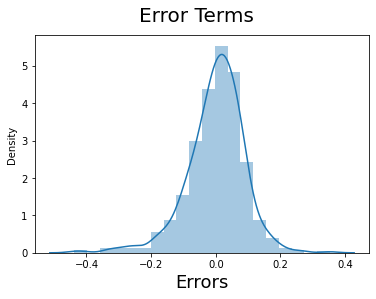

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins =20)
#Plot heading
fig.suptitle('Error Terms', fontsize = 20)
#X-label
plt.xlabel('Errors', fontsize = 18)
plt.show()

* Residual errors follow a normal distribution

## Making Predictions

In [78]:
X_test

,const,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Not Holiday,weathersit_Light Snow,weathersit_Mist
196,1.0,0.781941,0.601542,0.383346,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
187,1.0,0.860857,0.669666,0.282038,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14,1.0,0.217065,0.512853,0.279487,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
31,1.0,0.165779,0.853023,0.063540,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
390,1.0,0.352054,0.791345,0.105148,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1.0,0.561806,0.470008,0.448741,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
566,1.0,0.668758,0.889889,0.393568,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
688,1.0,0.392551,0.704370,0.124380,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,1
266,1.0,0.682257,0.886889,0.115430,0,0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,1


In [79]:
y_test

196    0.678900
187    0.525771
14     0.141049
31     0.153935
390    0.466291
         ...   
118    0.526116
566    0.510469
688    0.645651
266    0.621376
504    0.817648
Name: cnt, Length: 146, dtype: float64

In [80]:
X_test_new = X_test[X_train_new.columns]

In [81]:
X_test_new

,const,temp,hum,windspeed,season_Spring,season_Winter,yr_2019,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_May,mnth_Nov,mnth_Sep,holiday_Yes,weathersit_Light Snow,weathersit_Mist
196,1.0,0.781941,0.601542,0.383346,0,0,0,0,0,0,1,0,0,0,0,0,0
187,1.0,0.860857,0.669666,0.282038,0,0,0,0,0,0,1,0,0,0,0,0,0
14,1.0,0.217065,0.512853,0.279487,1,0,0,0,0,1,0,0,0,0,0,0,1
31,1.0,0.165779,0.853023,0.063540,1,0,0,0,1,0,0,0,0,0,0,0,1
390,1.0,0.352054,0.791345,0.105148,1,0,1,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,1.0,0.561806,0.470008,0.448741,0,0,0,0,0,0,0,0,0,0,0,0,0
566,1.0,0.668758,0.889889,0.393568,0,0,1,0,0,0,1,0,0,0,0,1,0
688,1.0,0.392551,0.704370,0.124380,0,1,1,0,0,0,0,0,1,0,0,0,1
266,1.0,0.682257,0.886889,0.115430,0,1,0,0,0,0,0,0,0,1,0,0,1


In [94]:
y_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

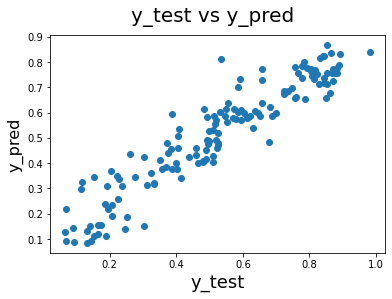

In [95]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)                       
plt.ylabel('y_pred', fontsize = 16)  

In [96]:
r2_score(y_test, y_pred)

0.8737101732239567

## Summary
* Dataset contains of boom bikes 2018,2019 rental users data with weather, hoilday or working day and count of users per day
* To understand the categorical data better encoded numbers to description
* Performed EDA univariate and multi variate analysis
* Dropped registered and causal columns to avoid multi collinearity
* Prepared data for model builing - used dummy variables on categorical columns
* Performed data scaling and split train test split (80:20 ratio)
* Built model and found adjusted r2 score as 83%
* Model built using RFE and used 20 features 
* Using the RFE support features built the model again
* verfied VIF
* Made final predictions and evaluation. r2 score found to be 87%.